# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [34]:
# For VSCODE
#%reload_ext autoreload
#%autoreload 2

## 0) Upload data

Import libraries

In [35]:
import pandas as pd

Import project files

In [37]:
from utils import nlp_utils, cluster_utils

Uploading data

In [38]:
train_file = 'data/df_filtered.csv'

Getting dataframe

In [39]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 15.6 ms
Wall time: 24 ms


Defining the word dictionary

In [41]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])

CPU times: total: 38.5 s
Wall time: 52.3 s


Clustering

eps 1.8145278898835595
CPU times: total: 30.4 s
Wall time: 40.5 s


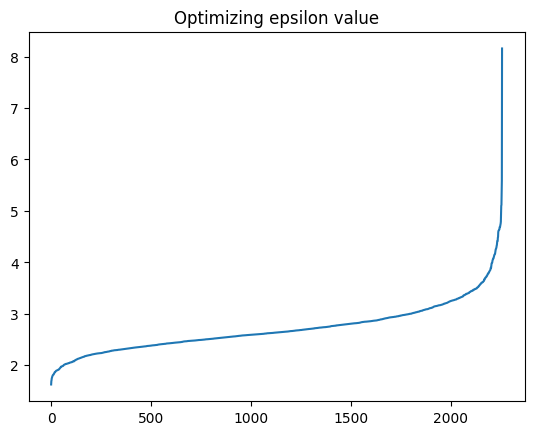

In [59]:
%%time
word_list = cluster_utils.get_word_list_for_clustering(word_dict)
embedded_dict = cluster_utils.embed_corpus(word_list)
cluster_dict, dist_dict, dbscan = cluster_utils.run_clustering(embedded_dict)

In [60]:
len(cluster_dict)

107

In [61]:
len(dist_dict)

107

In [63]:
dist_dict[9]

0.09503251314163208

Plotting tSNE

In [64]:
%%time
#cluster_utils.plot_tsne(embedded_dict, dbscan)

CPU times: total: 0 ns
Wall time: 0 ns


Plotting Jaccard index histogram

In [65]:
%%time
#nlp_utils.plot_jaccard_hist(df)

CPU times: total: 0 ns
Wall time: 0 ns


In [67]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['chocolate', 'banana', 'hi', 'cola', 'love']

Getting distance threshold

In [68]:
threshold = cluster_utils.define_max_threshold()

Starting average Jaccard index: 0.22417678771660815
the next cluster is too wide and wont be replaced: ['though', 'let', 'enough', 'carry', 'fill', 'everything', 'hopefully', 'find', 'anybody', 'another', 'break', 'high', 'time', 'basically', 'anyway', 'barely', 'reason', 'already', 'understand', 'yet', 'much', 'hardly', 'jump', 'run', 'four', 'mess', 'make', 'unless', 'easy', 'twice', 'still', 'normally', 'rather', 'yesterday', 'last', 'less', 'see', 'need', 'exactly', 'next', 'away', 'dumb', 'listen', 'year', 'sure', 'catch', 'otherwise', 'second', 'go', 'nothing', 'yeah', 'think', 'get', 'whole', 'three', 'every', 'collect', 'guess', 'talk', 'actually', 'bring', 'two', 'matter', 'either', 'forget', 'expect', 'however', 'tell', 'since', 'ever', 'unfortunately', 'although', 'whether', 'straight', 'many', 'soon', 'five', 'hear', 'necessary', 'today', 'perhaps', 'apparently', 'absolutely', 'handle', 'stupid', 'fly', 'loose', 'well', 'always', 'least', 'far', 'hope', 'obviously', 'else',

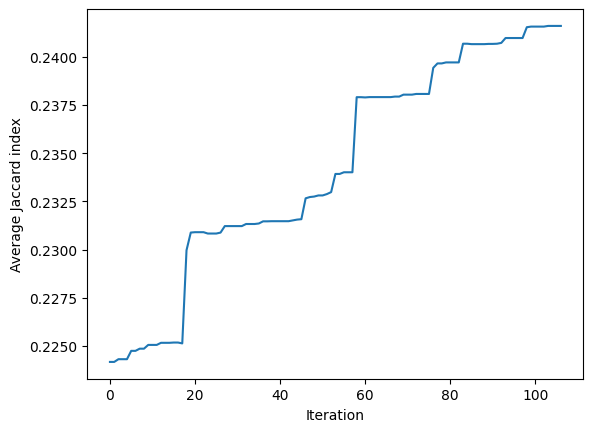

In [69]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [70]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : I have a copy of this bo...,{voice} (from) (the) farm : i (have) (a) copy ...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track be not the "" original ...","caution ! : (these) track {be} (not) (the) "" o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and be in excelle...,textbook : book ship quickly (and) {be} (in) e...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it be great ! ! ! : I like it . it be very coo...,(it) {be} [great] ! ! ! : i like (it) . (it) {...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools be just what ...,{docker} {do} (the) job . : (this) [tools] {be...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear : steer clear (of) (this) blu - ra...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,I like movie : as someone who like all kind of...,i like [movie] : (as) {someone} (who) like [al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted be fun ... : this book be sic...,sick (and) twisted {be} [fun] ... : (this) boo...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : I find this book ...,difficult (for) (a) lay person : i {find} (thi...


Looking at the histogram again

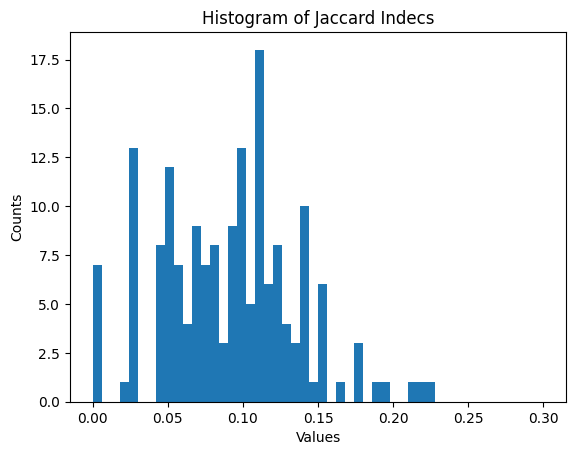

CPU times: total: 391 ms
Wall time: 416 ms


In [ ]:
%%time
nlp_utils.plot_jaccard_hist(df_2)